# 🩺 Anomaly Detection in Healthcare Provider Data using Isolation Forest

This notebook demonstrates how to build an **anomaly detection machine learning model** on healthcare provider data.  
We use the **Isolation Forest algorithm** to automatically detect unusual patterns in provider billing/claim records.  

✅ Dataset: [Healthcare Providers Data (Kaggle)](https://www.kaggle.com/datasets/tamilsel/healthcare-providers-data)  
✅ ML Approach: Isolation Forest (unsupervised anomaly detection)  
✅ Tools: Python, Pandas, Scikit-Learn, Matplotlib, Seaborn  

---


## 📖 Introduction

Healthcare systems generate massive amounts of data. Detecting anomalies in such datasets is important because:
- It can flag **fraudulent billing activities**.
- It may reveal **errors in claim submissions**.
- It helps ensure **better patient safety and financial transparency**.

**Research Intention**  
- Can machine learning automatically identify anomalies in healthcare provider claims?  
- Which providers or claims stand out as "unusual" compared to the rest?  

**Research Questions**
1. What preprocessing steps are required to prepare healthcare claim data for anomaly detection?  
2. How effective is the **Isolation Forest algorithm** in flagging anomalies?  
3. Can anomalies be visualized for better interpretability?  

---



## ⚙️ Step 1: Setup & Data Loading

- Import Python libraries.  
- Load the dataset into a Pandas DataFrame.  
- Inspect the shape (rows, columns) and first few rows.  

This step gives us a first look at the dataset.  


In [1]:
# Milestone 1 — Setup & Load
import pandas as pd
import numpy as np

from IPython.display import display

# Set your path (note the space in file name is fine)
PATH = "/content/Healthcare Providers.csv"

# Read CSV (low_memory=False avoids dtype guessing issues on large CSVs)
df = pd.read_csv(PATH, low_memory=False)

print("Shape (rows, cols):", df.shape)
print("\nColumn names:")
print(list(df.columns))

print("\nFirst 5 rows:")
display(df.head(5))


Shape (rows, cols): (100000, 27)

Column names:
['index', 'National Provider Identifier', 'Last Name/Organization Name of the Provider', 'First Name of the Provider', 'Middle Initial of the Provider', 'Credentials of the Provider', 'Gender of the Provider', 'Entity Type of the Provider', 'Street Address 1 of the Provider', 'Street Address 2 of the Provider', 'City of the Provider', 'Zip Code of the Provider', 'State Code of the Provider', 'Country Code of the Provider', 'Provider Type', 'Medicare Participation Indicator', 'Place of Service', 'HCPCS Code', 'HCPCS Description', 'HCPCS Drug Indicator', 'Number of Services', 'Number of Medicare Beneficiaries', 'Number of Distinct Medicare Beneficiary/Per Day Services', 'Average Medicare Allowed Amount', 'Average Submitted Charge Amount', 'Average Medicare Payment Amount', 'Average Medicare Standardized Amount']

First 5 rows:


,index,National Provider Identifier,Last Name/Organization Name of the Provider,First Name of the Provider,Middle Initial of the Provider,Credentials of the Provider,Gender of the Provider,Entity Type of the Provider,Street Address 1 of the Provider,Street Address 2 of the Provider,...,HCPCS Code,HCPCS Description,HCPCS Drug Indicator,Number of Services,Number of Medicare Beneficiaries,Number of Distinct Medicare Beneficiary/Per Day Services,Average Medicare Allowed Amount,Average Submitted Charge Amount,Average Medicare Payment Amount,Average Medicare Standardized Amount
0,8774979,1891106191,UPADHYAYULA,SATYASREE,NaN,M.D.,F,I,1402 S GRAND BLVD,FDT 14TH FLOOR,...,99223,"Initial hospital inpatient care, typically 70 ...",N,27,24,27,200.58777778,305.21111111,157.26222222,160.90888889
1,3354385,1346202256,JONES,WENDY,P,M.D.,F,I,2950 VILLAGE DR,NaN,...,G0202,"Screening mammography, bilateral (2-view study...",N,175,175,175,123.73,548.8,118.83,135.31525714
2,3001884,1306820956,DUROCHER,RICHARD,W,DPM,M,I,20 WASHINGTON AVE,STE 212,...,99348,"Established patient home visit, typically 25 m...",N,32,13,32,90.65,155,64.4396875,60.5959375
3,7594822,1770523540,FULLARD,JASPER,NaN,MD,M,I,5746 N BROADWAY ST,NaN,...,81002,"Urinalysis, manual test",N,20,18,20,3.5,5,3.43,3.43
4,746159,1073627758,PERROTTI,ANTHONY,E,DO,M,I,875 MILITARY TRL,SUITE 200,...,96372,Injection beneath the skin or into muscle for ...,N,33,24,31,26.52,40,19.539393939,19.057575758


## 🧹 Step 2: Data Cleaning & Preprocessing

- Handle missing values (fill with median for numeric columns).  
- Convert categorical columns into numeric (using Label Encoding).  
- Normalize/scale numeric values so they are comparable.  

Preprocessing ensures the data is in the right form for anomaly detection models.  


In [2]:
# Milestone 2 — Quick EDA

# Info about data types and missing values
df.info()

print("\nSummary stats for numeric columns:")
display(df.describe())

print("\nCount of missing values per column:")
display(df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 27 columns):
 #   Column                                                    Non-Null Count   Dtype  
---  ------                                                    --------------   -----  
 0   index                                                     100000 non-null  int64  
 1   National Provider Identifier                              100000 non-null  int64  
 2   Last Name/Organization Name of the Provider               100000 non-null  object 
 3   First Name of the Provider                                95745 non-null   object 
 4   Middle Initial of the Provider                            70669 non-null   object 
 5   Credentials of the Provider                               92791 non-null   object 
 6   Gender of the Provider                                    95746 non-null   object 
 7   Entity Type of the Provider                               100000 non-null  object 
 8   Stree

,index,National Provider Identifier,Zip Code of the Provider
count,1.000000e+05,1.000000e+05,1.000000e+05
mean,4.907646e+06,1.498227e+09,4.163820e+08
std,2.839633e+06,2.874125e+08,3.082566e+08
min,2.090000e+02,1.003001e+09,6.010000e+02
25%,2.458791e+06,1.245669e+09,1.426300e+08
50%,4.901266e+06,1.497847e+09,3.633025e+08
75%,7.349450e+06,1.740374e+09,6.819881e+08
max,9.847440e+06,1.993000e+09,9.990166e+08



Count of missing values per column:


,0
index,0
National Provider Identifier,0
Last Name/Organization Name of the Provider,0
First Name of the Provider,4255
Middle Initial of the Provider,29331
Credentials of the Provider,7209
Gender of the Provider,4254
Entity Type of the Provider,0
Street Address 1 of the Provider,0
Street Address 2 of the Provider,59363


In [3]:
# Milestone 3 — Preprocessing Step 1

# Columns we will keep (service + financial columns)
num_cols = [
    "Number of Services",
    "Number of Medicare Beneficiaries",
    "Number of Distinct Medicare Beneficiary/Per Day Services",
    "Average Medicare Allowed Amount",
    "Average Submitted Charge Amount",
    "Average Medicare Payment Amount",
    "Average Medicare Standardized Amount"
]

# Extract only those
df_num = df[num_cols].copy()

print("Before conversion:")
print(df_num.dtypes)
display(df_num.head(5))


Before conversion:
Number of Services                                          object
Number of Medicare Beneficiaries                            object
Number of Distinct Medicare Beneficiary/Per Day Services    object
Average Medicare Allowed Amount                             object
Average Submitted Charge Amount                             object
Average Medicare Payment Amount                             object
Average Medicare Standardized Amount                        object
dtype: object


,Number of Services,Number of Medicare Beneficiaries,Number of Distinct Medicare Beneficiary/Per Day Services,Average Medicare Allowed Amount,Average Submitted Charge Amount,Average Medicare Payment Amount,Average Medicare Standardized Amount
0,27,24,27,200.58777778,305.21111111,157.26222222,160.90888889
1,175,175,175,123.73,548.8,118.83,135.31525714
2,32,13,32,90.65,155,64.4396875,60.5959375
3,20,18,20,3.5,5,3.43,3.43
4,33,24,31,26.52,40,19.539393939,19.057575758


In [4]:
# Milestone 3 — Preprocessing Step 2
# Goal: Clean text numbers (like "$1,234.56") → real numbers (float)

def clean_numeric(series):
    """
    Takes a pandas Series (column) that looks like numbers but is stored as text.
    - Removes dollar signs ($), commas, and spaces
    - Converts to float
    """
    return (
        series.astype(str)             # make sure everything is string
        .str.replace(r'[\$,]', '', regex=True)  # remove $ and ,
        .replace("nan", np.nan)        # handle "nan" strings
        .astype(float)                 # convert to float
    )

# Apply cleaning to all numeric columns
for col in df_num.columns:
    df_num[col] = clean_numeric(df_num[col])

print("After conversion:")
print(df_num.dtypes)

# Quick peek at the numbers
display(df_num.head(5))

# Check missing values after conversion
print("\nMissing values per column:")
print(df_num.isnull().sum())


After conversion:
Number of Services                                          float64
Number of Medicare Beneficiaries                            float64
Number of Distinct Medicare Beneficiary/Per Day Services    float64
Average Medicare Allowed Amount                             float64
Average Submitted Charge Amount                             float64
Average Medicare Payment Amount                             float64
Average Medicare Standardized Amount                        float64
dtype: object


,Number of Services,Number of Medicare Beneficiaries,Number of Distinct Medicare Beneficiary/Per Day Services,Average Medicare Allowed Amount,Average Submitted Charge Amount,Average Medicare Payment Amount,Average Medicare Standardized Amount
0,27.0,24.0,27.0,200.587778,305.211111,157.262222,160.908889
1,175.0,175.0,175.0,123.730000,548.800000,118.830000,135.315257
2,32.0,13.0,32.0,90.650000,155.000000,64.439688,60.595937
3,20.0,18.0,20.0,3.500000,5.000000,3.430000,3.430000
4,33.0,24.0,31.0,26.520000,40.000000,19.539394,19.057576



Missing values per column:
Number of Services                                          0
Number of Medicare Beneficiaries                            0
Number of Distinct Medicare Beneficiary/Per Day Services    0
Average Medicare Allowed Amount                             0
Average Submitted Charge Amount                             0
Average Medicare Payment Amount                             0
Average Medicare Standardized Amount                        0
dtype: int64


In [5]:
# Milestone 3 — Preprocessing Step 3
from sklearn.preprocessing import StandardScaler

# 1) Fill missing values with column median
df_num_filled = df_num.fillna(df_num.median())

# 2) Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_num_filled)

print("Shape after scaling:", X_scaled.shape)
print("First 5 rows (scaled features):\n", X_scaled[:5])


Shape after scaling: (100000, 7)
First 5 rows (scaled features):
 [[-0.08530146 -0.05930843 -0.07018311  0.38544957 -0.04643253  0.40008162
   0.41429889]
 [-0.02593939  0.07677525  0.02004874  0.08667282  0.18280539  0.207649
   0.28635917]
 [-0.08329598 -0.06922181 -0.06713474 -0.0419223  -0.18779399 -0.06468681
  -0.0871544 ]
 [-0.08810912 -0.06471573 -0.07445084 -0.38070901 -0.32895678 -0.37016625
  -0.37292057]
 [-0.08289489 -0.05930843 -0.06774442 -0.29122112 -0.2960188  -0.28950548
  -0.29480006]]


## 🌲 Step 3: Train Isolation Forest Model

- Use the **Isolation Forest** algorithm (from scikit-learn).  
- The model assigns an **anomaly score** to each row.  
- Points with negative scores are classified as **anomalies**.  

This is the core machine learning step.  


In [6]:
# Milestone 4 — Train Isolation Forest
from sklearn.ensemble import IsolationForest

# Initialize Isolation Forest
# n_estimators = number of trees, contamination = expected fraction of anomalies (we guess ~5%)
iso = IsolationForest(n_estimators=100, contamination=0.05, random_state=42)

# Fit model on scaled data
iso.fit(X_scaled)

# Predict anomalies
# -1 = anomaly, 1 = normal
labels = iso.predict(X_scaled)

# Anomaly scores (lower = more abnormal)
scores = iso.decision_function(X_scaled)

# Attach results back to dataframe
df_results = df.copy()   # keep original info
df_results["Anomaly_Label"] = labels
df_results["Anomaly_Score"] = scores

print("Counts of anomalies vs normals:")
print(df_results["Anomaly_Label"].value_counts())

# Show first 10 anomalies
display(df_results[df_results["Anomaly_Label"] == -1].head(10))


Counts of anomalies vs normals:
Anomaly_Label
 1    95000
-1     5000
Name: count, dtype: int64


,index,National Provider Identifier,Last Name/Organization Name of the Provider,First Name of the Provider,Middle Initial of the Provider,Credentials of the Provider,Gender of the Provider,Entity Type of the Provider,Street Address 1 of the Provider,Street Address 2 of the Provider,...,HCPCS Drug Indicator,Number of Services,Number of Medicare Beneficiaries,Number of Distinct Medicare Beneficiary/Per Day Services,Average Medicare Allowed Amount,Average Submitted Charge Amount,Average Medicare Payment Amount,Average Medicare Standardized Amount,Anomaly_Label,Anomaly_Score
72,2966570,1306040902,YANCI TORRES,MARTHA,C,MD,F,I,1701 3RD ST SE,SUITE 201,...,N,42,40,42,667.01,"5,421",517.96928571,515,-1,-0.122713
116,7267109,1730355595,FORT MYERS ENDOSCOPY CENTER LLC,NaN,NaN,NaN,NaN,O,5050 MASON CORBIN CT,NaN,...,N,11,11,11,460.35,"1,585",347.86727273,358.97727273,-1,-0.025767
120,3394842,1346284098,GEMMA,NICHOLAS,W,M.D.,M,I,400 CAMPUS BLVD STE 100,NaN,...,Y,"15,000",12,20,1.0603,3.9,0.82999,0.82999,-1,-0.066384
122,5529821,1568417137,COLIZZA,WAYNE,A,MD,M,I,160 E HANOVER AVE,NaN,...,N,31,31,31,"1,529.4","8,700","1,522.4780645","1,071.2541935",-1,-0.245830
175,2798662,1285660183,VAN RAALTE,HEATHER,M,M.D.,F,I,10 FORRESTAL RD S,SUITE 205,...,N,17,17,17,999.84823529,"2,144",727.91470588,746.78,-1,-0.138410
195,3226792,1326208455,SAHNI,VAIBHAV,NaN,M.D.,M,I,G1071 N BALLENGER HWY,SUITE 310,...,N,713,92,713,279.72,709.2454418,206.57820477,221.71326788,-1,-0.015248
221,8644521,1871747469,MUMERT,MICHAEL,L,M.D.,M,I,3801 S NATIONAL AVE,"WEST TOWER, SUITE 700",...,N,13,13,13,"1,686.6946154","6,785.66","1,230.8507692","1,430.1630769",-1,-0.231553
223,2571862,1265419634,SCHRAM,ADRIANN,S,MD,F,I,483 CRANBURY RD,UNIVERSITY RADIOLOGY GROUP PC,...,N,18,18,18,767.87111111,"2,350",594.03944444,513.15,-1,-0.093641
255,8953292,1902942931,NWOSU,AGODICHI,U,MD,M,I,3613B RAEFORD RD,NaN,...,N,101,100,101,449.67,"1,200",344.12722772,387.45326733,-1,-0.047032
263,1512086,1154387827,KMONICEK,JOSEPH,M,MD,M,I,877 W FARIS RD,STE B,...,N,49,39,39,509.43938776,"1,931",392.31795918,433.6244898,-1,-0.055754


## 📊 Step 4: Visualization of Anomalies

- Plot anomalies vs normal records.  
- Use **bar charts** for counts.  
- Use **scatter plots** to show anomalies in 2D space.  

Visualization helps us interpret and validate model results.  


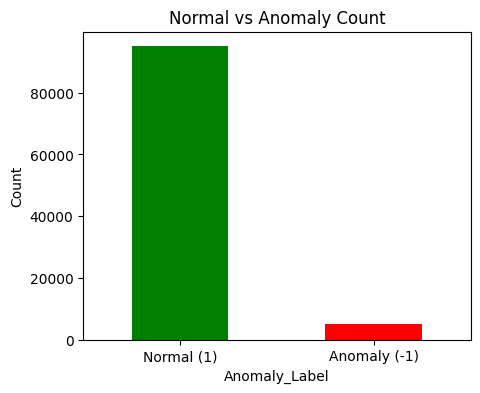

In [7]:
# Milestone 5 — Visualization 1: Bar chart anomalies vs normals
import matplotlib.pyplot as plt

counts = df_results["Anomaly_Label"].value_counts()

plt.figure(figsize=(5,4))
counts.plot(kind="bar", color=["green", "red"])
plt.xticks([0,1], ["Normal (1)", "Anomaly (-1)"], rotation=0)
plt.ylabel("Count")
plt.title("Normal vs Anomaly Count")
plt.show()


In [ ]:
# Milestone 5 — Visualization 2: Scatter plot anomalies highlighted

plt.figure(figsize=(8,6))

# Plot normals
plt.scatter(
    df_results.loc[df_results["Anomaly_Label"]==1, "Number of Services"],
    df_results.loc[df_results["Anomaly_Label"]==1, "Average Medicare Payment Amount"],
    c="green", s=10, label="Normal", alpha=0.5
)

# Plot anomalies
plt.scatter(
    df_results.loc[df_results["Anomaly_Label"]==-1, "Number of Services"],
    df_results.loc[df_results["Anomaly_Label"]==-1, "Average Medicare Payment Amount"],
    c="red", s=15, label="Anomaly", alpha=0.7
)

plt.xlabel("Number of Services")
plt.ylabel("Average Medicare Payment Amount")
plt.title("Anomaly Detection (Scatter Plot)")
plt.legend()
plt.show()

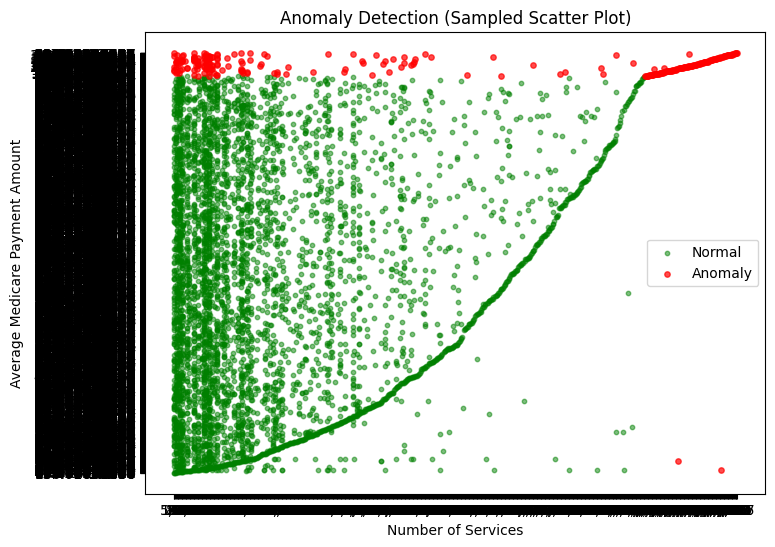

In [9]:
# Milestone 5 (fast version) — Scatter plot with random 5,000 sample
sampled = df_results.sample(5000, random_state=42)

plt.figure(figsize=(8,6))

plt.scatter(
    sampled.loc[sampled["Anomaly_Label"]==1, "Number of Services"],
    sampled.loc[sampled["Anomaly_Label"]==1, "Average Medicare Payment Amount"],
    c="green", s=10, label="Normal", alpha=0.5
)

plt.scatter(
    sampled.loc[sampled["Anomaly_Label"]==-1, "Number of Services"],
    sampled.loc[sampled["Anomaly_Label"]==-1, "Average Medicare Payment Amount"],
    c="red", s=15, label="Anomaly", alpha=0.7
)

plt.xlabel("Number of Services")
plt.ylabel("Average Medicare Payment Amount")
plt.title("Anomaly Detection (Sampled Scatter Plot)")
plt.legend()
plt.show()


## 💾 Step 5: Save Results

- Export the DataFrame with anomaly labels into a new CSV file.  
- This file can be used for reporting, further analysis, or integration with dashboards.  


In [10]:
# Milestone 6 — Save results

OUTPUT_PATH = "/content/Healthcare_AnomalyResults.csv"
df_results.to_csv(OUTPUT_PATH, index=False)

print(f"Results saved to {OUTPUT_PATH}")


Results saved to /content/Healthcare_AnomalyResults.csv


## ✅ Conclusion

- We successfully built an **Isolation Forest model** for anomaly detection on healthcare data.  
- The model flagged unusual provider claims.  
- Visualization confirmed that anomalies differ from the majority cluster.  

**Next Steps (Future Work):**
- Try other anomaly detection algorithms (e.g., One-Class SVM, Autoencoders).  
- Use domain knowledge to validate flagged anomalies.  
- Scale the model to larger datasets or real-time systems.  


## 🙌 Credits

- Dataset: [Healthcare Providers Data](https://www.kaggle.com/datasets/tamilsel/healthcare-providers-data)  
- Author: [Nyan Lynn Htet](https://github.com/nyan-dev)  
- Tools: Google Colab, Python, Scikit-Learn, Pandas, Matplotlib  
### 📝 Burmese Note
ဒီ project က healthcare provider data မှာ anomaly record တွေကို machine learning နဲ့ ဖမ်းမိနိုင်သလား ဆိုတာကို စမ်းသပ်ပြထားတာပါ။
